In [192]:
import numpy as np
import pandas as pd

In [193]:
df = pd.read_csv('emails.csv')

In [194]:
df.sample(5)

,text,spam
1690,Subject: thanks vince : thanks for the time ...,0
2974,Subject: energy futures contracts project ple...,0
3858,"Subject: martin jermakyan hi there , i am fa...",0
4125,Subject: transportation for m . gillis and g ....,0
1432,Subject: continuation of spanish classes roy ...,0


In [195]:
df.shape

(5728, 2)

In [196]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [198]:
# drop last 3 cols
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [199]:
df.sample(5)

,text,spam
2155,Subject: research allocations to egm hi becky...,0
3800,Subject: re : mutually agreed upon changes oka...,0
2445,Subject: re : it was nice meeting you at the i...,0
4272,Subject: re : summer internships at enron tha...,0
5572,Subject: re : life . . . : ) maybe next time...,0


In [200]:
# renaming the cols
df.rename(columns={'spam':'target'},inplace=True)
df.sample(5)

,text,target
3572,Subject: request submitted : access request fo...,0
5535,Subject: the impact of ecuador ' s heavy crude...,0
2477,Subject: times 2 filing units pat : recently...,0
1694,Subject: thursday summer intern dinner vince ...,0
2345,Subject: revised : restricted list neither en...,0


In [201]:
df = df[['target','text']]

In [202]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [203]:
df['target'] = encoder.fit_transform(df['target'])

In [204]:
df.head()

,target,text
0,1,Subject: naturally irresistible your corporate...
1,1,Subject: the stock trading gunslinger fanny i...
2,1,Subject: unbelievable new homes made easy im ...
3,1,Subject: 4 color printing special request add...
4,1,"Subject: do not have money , get software cds ..."


In [205]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [206]:
# check for duplicate values
df.duplicated().sum()

33

In [207]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [208]:
df.duplicated().sum()

0

In [209]:
df.shape

(5695, 2)

## 2.EDA

In [210]:
df.head()

,target,text
0,1,Subject: naturally irresistible your corporate...
1,1,Subject: the stock trading gunslinger fanny i...
2,1,Subject: unbelievable new homes made easy im ...
3,1,Subject: 4 color printing special request add...
4,1,"Subject: do not have money , get software cds ..."


In [211]:
df['target'].value_counts()

0    4327
1    1368
Name: target, dtype: int64

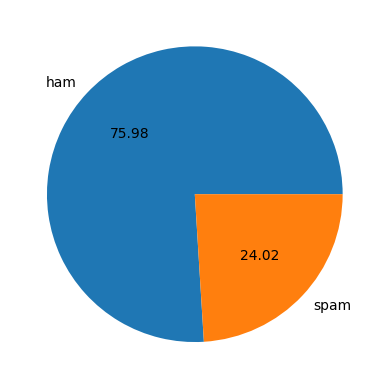

In [212]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [213]:
# Data is imbalanced

In [214]:
import nltk

In [215]:
!pip install nltk

In [216]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [217]:
df['num_characters'] = df['text'].apply(len)

In [218]:
df.head()

,target,text,num_characters
0,1,Subject: naturally irresistible your corporate...,1484
1,1,Subject: the stock trading gunslinger fanny i...,598
2,1,Subject: unbelievable new homes made easy im ...,448
3,1,Subject: 4 color printing special request add...,500
4,1,"Subject: do not have money , get software cds ...",235


In [219]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [220]:
df.head()

,target,text,num_characters,num_words
0,1,Subject: naturally irresistible your corporate...,1484,325
1,1,Subject: the stock trading gunslinger fanny i...,598,90
2,1,Subject: unbelievable new homes made easy im ...,448,88
3,1,Subject: 4 color printing special request add...,500,99
4,1,"Subject: do not have money , get software cds ...",235,53


In [221]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [222]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,Subject: naturally irresistible your corporate...,1484,325,11
1,1,Subject: the stock trading gunslinger fanny i...,598,90,1
2,1,Subject: unbelievable new homes made easy im ...,448,88,4
3,1,Subject: 4 color printing special request add...,500,99,5
4,1,"Subject: do not have money , get software cds ...",235,53,9


In [223]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [224]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [225]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [226]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

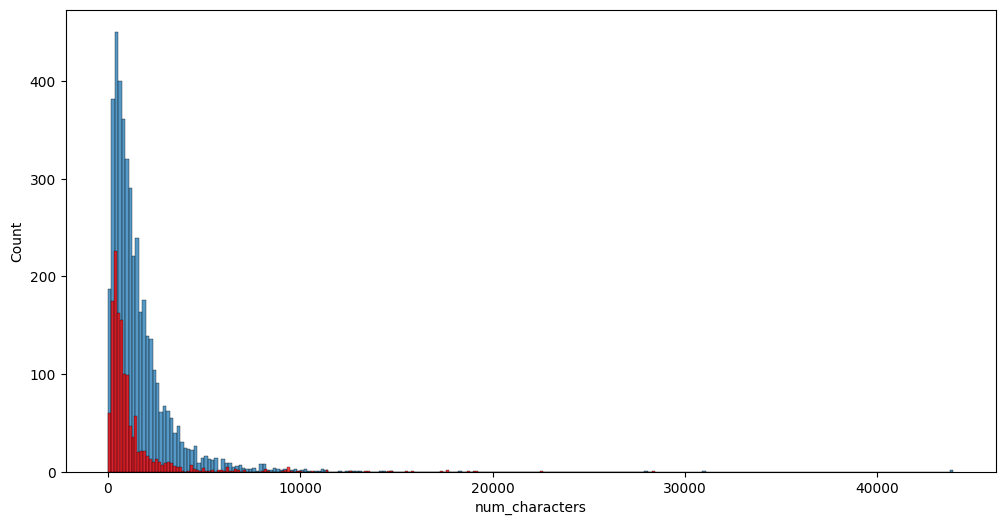

In [227]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

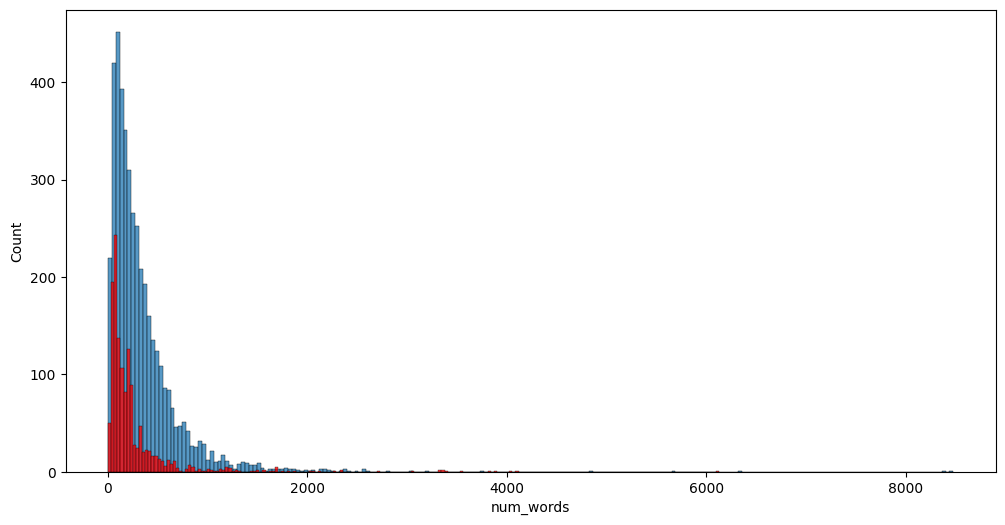

In [228]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

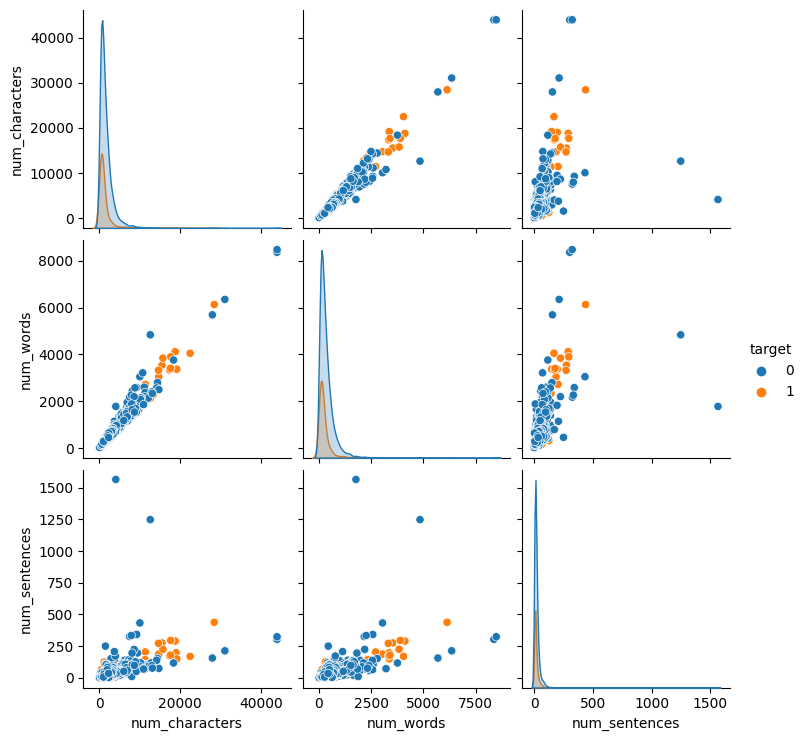

In [229]:
sns.pairplot(df,hue='target')

<ipython-input-230-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

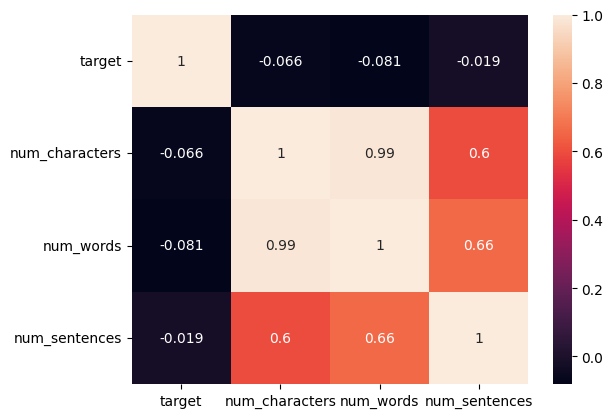

In [230]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [231]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [232]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [233]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [234]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [235]:
df['text'][10]

"Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . "

In [236]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [237]:
df['transformed_text'] = df['text'].apply(transform_text)

In [238]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Subject: naturally irresistible your corporate...,1484,325,11,subject natur irresist corpor ident lt realli ...
1,1,Subject: the stock trading gunslinger fanny i...,598,90,1,subject stock trade gunsling fanni merril muzo...
2,1,Subject: unbelievable new homes made easy im ...,448,88,4,subject unbeliev new home made easi im want sh...
3,1,Subject: 4 color printing special request add...,500,99,5,subject 4 color print special request addit in...
4,1,"Subject: do not have money , get software cds ...",235,53,9,subject money get softwar cd softwar compat gr...


In [239]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [240]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

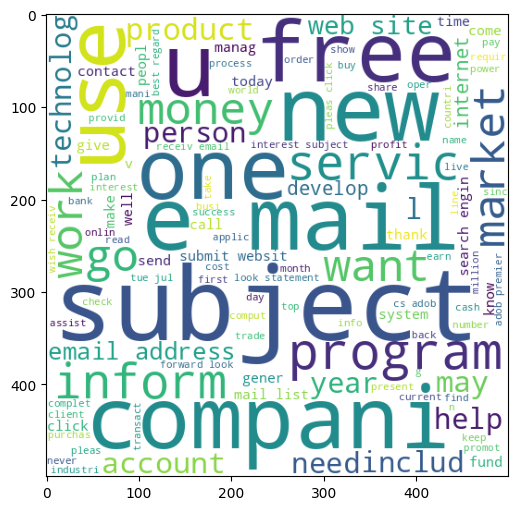

In [241]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [242]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

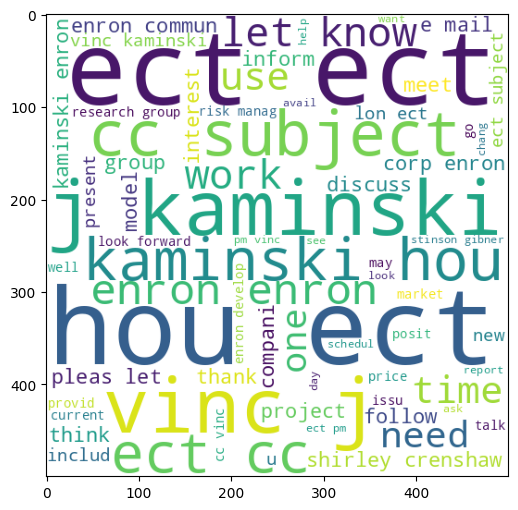

In [243]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [244]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Subject: naturally irresistible your corporate...,1484,325,11,subject natur irresist corpor ident lt realli ...
1,1,Subject: the stock trading gunslinger fanny i...,598,90,1,subject stock trade gunsling fanni merril muzo...
2,1,Subject: unbelievable new homes made easy im ...,448,88,4,subject unbeliev new home made easi im want sh...
3,1,Subject: 4 color printing special request add...,500,99,5,subject 4 color print special request addit in...
4,1,"Subject: do not have money , get software cds ...",235,53,9,subject money get softwar cd softwar compat gr...


In [245]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [246]:
len(spam_corpus)

174630

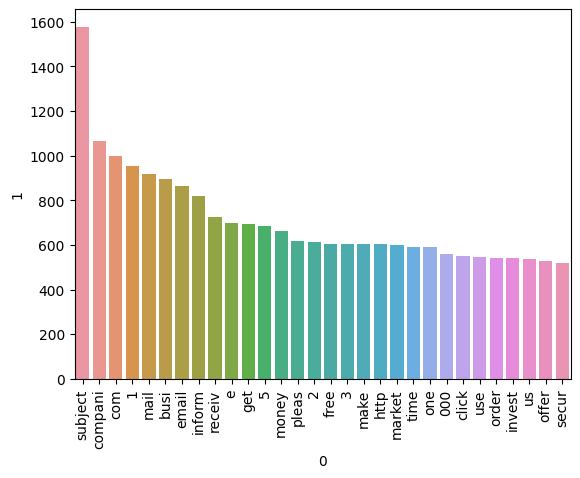

In [247]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [248]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [249]:
len(ham_corpus)

702991

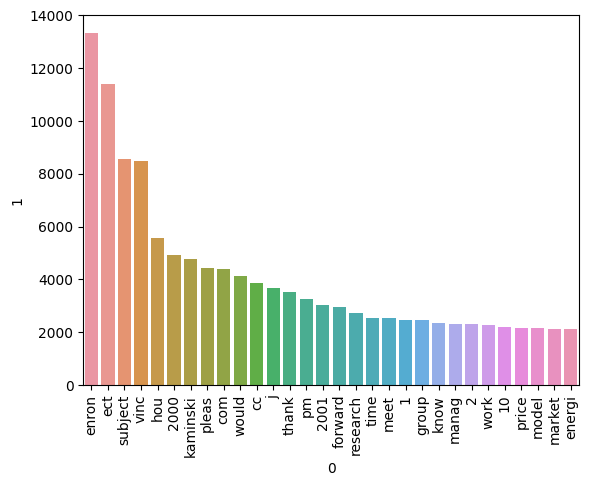

In [250]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [251]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Subject: naturally irresistible your corporate...,1484,325,11,subject natur irresist corpor ident lt realli ...
1,1,Subject: the stock trading gunslinger fanny i...,598,90,1,subject stock trade gunsling fanni merril muzo...
2,1,Subject: unbelievable new homes made easy im ...,448,88,4,subject unbeliev new home made easi im want sh...
3,1,Subject: 4 color printing special request add...,500,99,5,subject 4 color print special request addit in...
4,1,"Subject: do not have money , get software cds ...",235,53,9,subject money get softwar cd softwar compat gr...


## 4. Model Building

In [252]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [253]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [254]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [255]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [256]:
X.shape

(5695, 3000)

In [257]:
y = df['target'].values

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [260]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [261]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [262]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[837  12]
 [ 43 247]]
0.9536679536679536


In [263]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9850746268656716
[[846   3]
 [ 14 276]]
0.989247311827957


In [264]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[785  64]
 [  1 289]]
0.8186968838526912


In [265]:
# tfidf --> MNB

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [267]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [268]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [269]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [270]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.990342405618964, 0.9929328621908127)

In [271]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.990342405618964
Precision -  0.9929328621908127
For  KN
Accuracy -  0.9771729587357331
Precision -  0.9782608695652174
For  NB
Accuracy -  0.9850746268656716
Precision -  0.989247311827957
For  DT
Accuracy -  0.9236172080772608
Precision -  0.8048048048048048
For  LR
Accuracy -  0.971027216856892
Precision -  0.9706959706959707
For  RF
Accuracy -  0.9824407374890255
Precision -  0.9927007299270073
For  AdaBoost
Accuracy -  0.9692712906057945
Precision -  0.967032967032967
For  BgC
Accuracy -  0.9657594381035997
Precision -  0.9403508771929825
For  ETC
Accuracy -  0.9833187006145742
Precision -  0.9927272727272727
For  GBDT
Accuracy -  0.9561018437225637
Precision -  0.9651162790697675
For  xgb
Accuracy -  0.9885864793678666
Precision -  0.9632107023411371


In [272]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [273]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.990342,0.992933
8,ETC,0.983319,0.992727
5,RF,0.982441,0.992701
2,NB,0.985075,0.989247
1,KN,0.977173,0.978261
4,LR,0.971027,0.970696
6,AdaBoost,0.969271,0.967033
9,GBDT,0.956102,0.965116
10,xgb,0.988586,0.963211
7,BgC,0.965759,0.940351


In [274]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [275]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.990342
1,ETC,Accuracy,0.983319
2,RF,Accuracy,0.982441
3,NB,Accuracy,0.985075
4,KN,Accuracy,0.977173
5,LR,Accuracy,0.971027
6,AdaBoost,Accuracy,0.969271
7,GBDT,Accuracy,0.956102
8,xgb,Accuracy,0.988586
9,BgC,Accuracy,0.965759


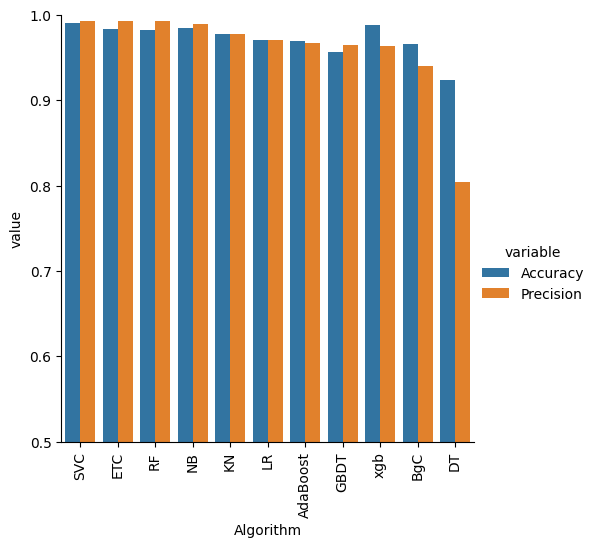

In [276]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [277]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [278]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [279]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [280]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [281]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [282]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [283]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.990342,0.992933,0.990342,0.992933,0.990342,0.992933,0.990342,0.992933
1,ETC,0.983319,0.992727,0.983319,0.992727,0.983319,0.992727,0.983319,0.992727
2,RF,0.982441,0.992701,0.982441,0.992701,0.982441,0.992701,0.982441,0.992701
3,NB,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247
4,KN,0.977173,0.978261,0.977173,0.978261,0.977173,0.978261,0.977173,0.978261
5,LR,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696
6,AdaBoost,0.969271,0.967033,0.969271,0.967033,0.969271,0.967033,0.969271,0.967033
7,GBDT,0.956102,0.965116,0.956102,0.965116,0.956102,0.965116,0.956102,0.965116
8,xgb,0.988586,0.963211,0.988586,0.963211,0.988586,0.963211,0.988586,0.963211
9,BgC,0.965759,0.940351,0.965759,0.940351,0.965759,0.940351,0.965759,0.940351


In [284]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [285]:
voting = VotingClassifier(estimators=[('svm', svc), ('rf', rfc), ('et', etc)],voting='soft')

In [286]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('rf', rfc), ('et', etc)]
pipfinal_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [291]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.990342405618964
Precision 0.9894736842105263


In [292]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))